In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
l = df['label']
d = df.drop(['label'],axis=1)

In [7]:
print(l.shape)
print(d.shape)

(42000,)
(42000, 784)


In [8]:
idx = 1
print(l[idx])

0


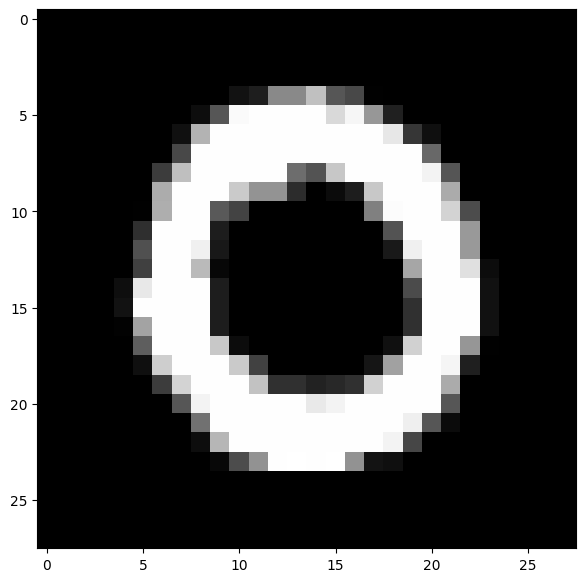

In [9]:
plt.figure(figsize=(7,7))
grid_data = d.loc[idx].values.reshape(28,28)
plt.imshow(grid_data,interpolation='none',cmap='gray')
plt.show()

2D visulisation using PCA

In [12]:
labels = l.head(15000)
data = d.head(15000)
print('The Shape of Shimple Data = ',data.shape)

The Shape of Shimple Data =  (15000, 784)


Data Preprocessing - stardardizing the data

In [13]:
from sklearn.preprocessing import StandardScaler

std_data = StandardScaler().fit_transform(data)
print(std_data.shape)

(15000, 784)


Find the Covariance Matrix

In [14]:
sample_data = std_data
covar_matrix = np.matmul(sample_data.T,sample_data)
print('the shape of variance matrix',covar_matrix.shape)

the shape of variance matrix (784, 784)


Computing Eigenvalue and Eigenvector

In [15]:
from scipy.linalg import eigh

values,vectors = eigh(covar_matrix,eigvals=(782,783))
print('Shape of eigen vectors = ',vectors.shape)
vectors=vectors.T
print('Updated shape of eigen vectors =',vectors.shape)

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors = (2, 784)


In [17]:
new_cordinates = np.matmul(vectors,sample_data.T)
print("resultant new data points ' shape", vectors.shape,"X",sample_data.T.shape," = ", new_cordinates.shape)

new_cordinates = np.vstack((new_cordinates,labels)).T
dataframe = pd.DataFrame(data= new_cordinates,columns=('1st principle','2nd principle','label'))
print(dataframe.head())

resultant new data points ' shape (2, 784) X (784, 15000)  =  (2, 15000)
   1st principle  2nd principle  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


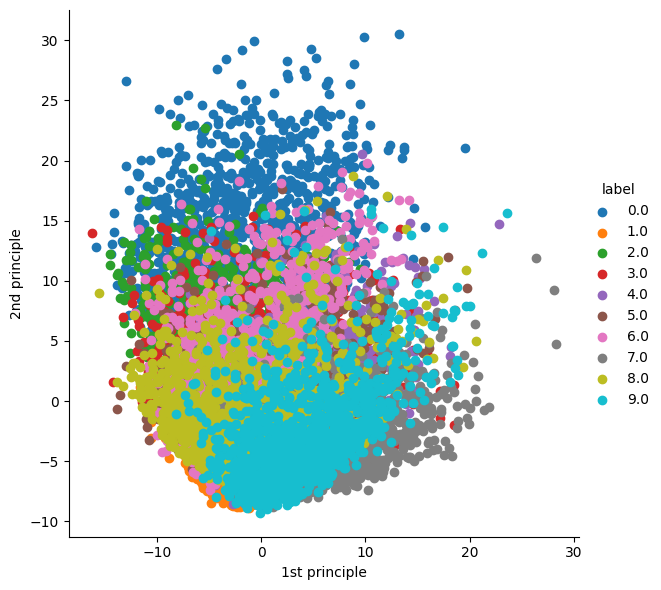

In [20]:
import seaborn as sns 
sns.FacetGrid(dataframe,hue='label',height=6).map(plt.scatter,'1st principle','2nd principle').add_legend()
plt.show()

PCA using sklearn

In [21]:
from sklearn import decomposition

In [22]:
pca = decomposition.PCA()

In [23]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
print('shape of PCA_reduced = ',pca_data.shape)

shape of PCA_reduced =  (15000, 2)


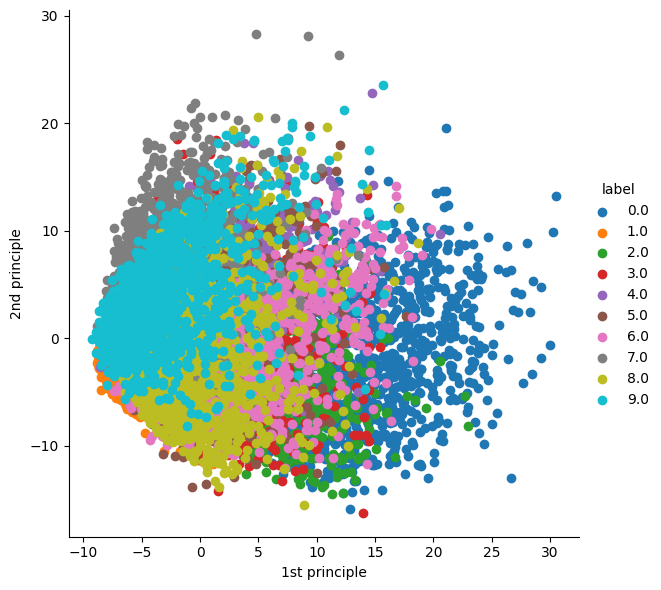

In [24]:
pca_data = np.vstack((pca_data.T,labels)).T

pca_df = pd.DataFrame(data= pca_data,columns=('1st principle','2nd principle','label'))
sns.FacetGrid(pca_df,hue='label',height=6).map(plt.scatter,'1st principle','2nd principle').add_legend()
plt.show()

PCA for dimensionality reduction

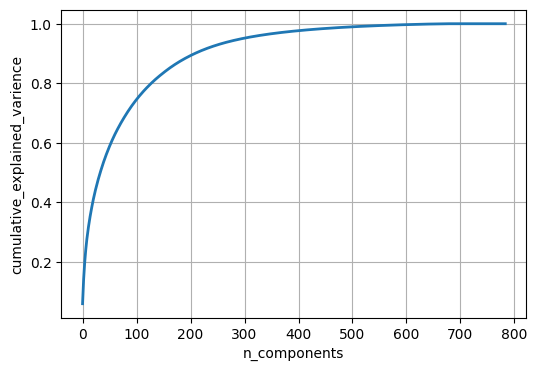

In [25]:
pca.n_components = 784

pca_data = pca.fit_transform(sample_data)
percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)
plt.figure(1,figsize=(6,4))

plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cumulative_explained_varience')
plt.show() 

in 200 columns ,we can easily get 90% of varience